In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [98]:
import numpy as np
import pandas as pd
np.random.seed(0)
df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
                   'office_id': list(range(1, 7)) * 2,
                   'sales': [np.random.randint(100000, 999999)
                             for _ in range(12)]})
# x is a Series --> taking the sum of the Series, divide itself by the sum
df['ratio_sales'] = df.groupby('state')['sales'].apply(lambda x: round(x/x.sum()*100, 2))
df

df2 = df.groupby(['state', 'office_id'])['sales'].sum()
df2.groupby(level=0).apply(lambda x: round(x/x.sum()*100, 2))

# unstack
# merge

state  office_id
AZ     2            16.98
       4            19.25
       6            63.77
CA     1            19.33
       3            33.86
       5            46.81
CO     1            36.85
       3            19.87
       5            43.27
WA     2            34.71
       4            35.51
       6            29.78
Name: sales, dtype: float64

In [99]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)
df.head()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [100]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [101]:
# your code here
tristate = df[(df['_STATE'] == 9.0) | (df['_STATE'] == 34.0) | (df['_STATE'] == 36.0)]
tristate = df[df['_STATE'].isin([9,34,36])]
tristate.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


Now check to see how large our subset df.

In [102]:
# your code here
tristate.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [103]:
df['PHYSHLTH'].describe()
tristate['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [104]:
#your code here
zero_dict = {88:0, 
             77: np.nan,
             99: np.nan}
tristate['PHYSHLTH'] = tristate['PHYSHLTH'].replace(zero_dict)

In [105]:
tristate['PHYSHLTH'].describe()
tristate.shape

(34545, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [106]:
# descriptive statistics
tristate['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


{'whiskers': [<matplotlib.lines.Line2D at 0x122237470>,
 'caps': [<matplotlib.lines.Line2D at 0x122243e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1222370f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1219767b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x121976390>],
 'means': []}

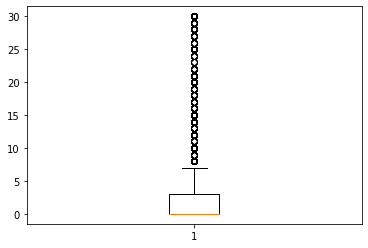

In [107]:
# graphic showing those descriptive stats
tristate.nonans = tristate['PHYSHLTH']
tristate.nonans = tristate.nonans[~np.isnan(tristate.nonans)]
# tristate.nonans
plt.boxplot(tristate.nonans)

Text(0.5, 1.0, 'Frequency of Number of Sick Days')

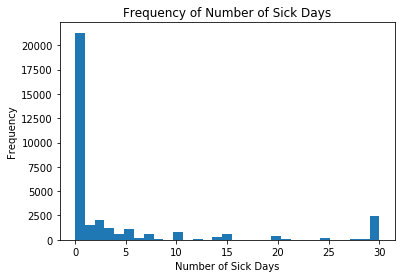

In [108]:
# graphic showing the distribution of data
plt.hist(tristate.nonans, bins = 31);
plt.xlabel('Number of Sick Days')
plt.ylabel('Frequency')
plt.title('Frequency of Number of Sick Days')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [109]:
# code to calculate the average number of sick days by state
avg_days = tristate.groupby('_STATE')['PHYSHLTH'].mean().reset_index()
avg_days

,_STATE,PHYSHLTH
0,9.0,3.688562
1,34.0,4.380957
2,36.0,4.148030


Text(0.5, 1.0, 'Avg. Sick Days Per State')

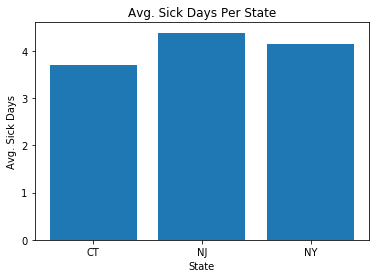

In [110]:
# code to graph those averages using matplotlib
states = ['CT', 'NJ', 'NY']
plt.bar(states, avg_days['PHYSHLTH'])
plt.xlabel('State')
plt.ylabel('Avg. Sick Days')
plt.title('Avg. Sick Days Per State')

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [111]:
# code to create new colum for chronically sick
tristate['chronic'] = list(map(lambda x: x > 7, tristate['PHYSHLTH']))
tristate[['chronic', 'PHYSHLTH']].head() # check values
# tristate['chronic'] = np.where(df['PHYSHLTH']>=20, 1, 0)

,chronic,PHYSHLTH
49938,False,0.0
49939,False,0.0
49940,False,2.0
49941,False,0.0
49942,False,0.0


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [112]:
# code to calculate averages per state
# df2 = df.groupby(['state', 'office_id'])['sales'].sum()
# df2.groupby(level=0).apply(lambda x: round(x/x.sum()*100, 2))
# tri_chronic_sick = tristate.groupby(['_STATE'])['chronic'].sum().reset_index()
# tri_chronic_total = tristate.groupby(['_STATE'])['chronic'].count().reset_index()
tri_chronic = tristate.groupby('_STATE')['chronic'].apply(lambda x: round(x.sum()/x.count() * 100, 2)).reset_index()
tri_chronic

,_STATE,chronic
0,9.0,13.61
1,34.0,16.19
2,36.0,15.14


Text(0.5, 1.0, 'Percentage of Chronically Ill People Per State')

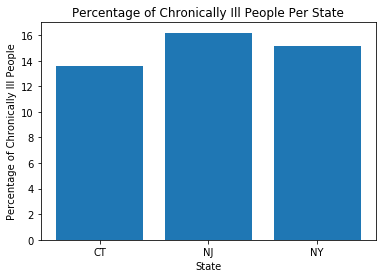

In [113]:
# create graphic to compare chronically sick by state
states = ['CT', 'NJ', 'NY']
plt.bar(states, tri_chronic['chronic'])
plt.xlabel('State')
plt.ylabel('Percentage of Chronically Ill People')
plt.title('Percentage of Chronically Ill People Per State')

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [114]:
zero_dict = {7:np.nan, 
             9: np.nan}
tristate['SMOKE_CAT'] = tristate['SMOKDAY2'].replace(zero_dict)

In [115]:
tristate['SMOKE_CAT'].describe()

count    13750.000000
mean         2.511055
std          0.799475
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: SMOKE_CAT, dtype: float64

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Frequency of Smoker Type')

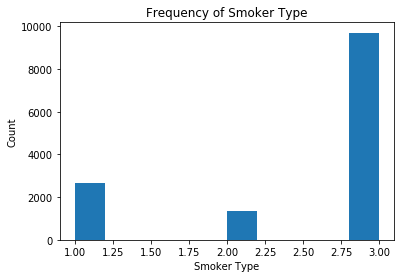

In [116]:
plt.hist(tristate['SMOKE_CAT'])
plt.xlabel('Smoker Type')
plt.ylabel('Count')
plt.title('Frequency of Smoker Type')

In [117]:
categorical_dict = {1:'Everyday', 
                    2:'Sometimes',
                    3: 'Never'}
tristate['SMOKE_CAT'] = tristate['SMOKE_CAT'].replace(categorical_dict)

In [118]:
grouped = tristate.groupby(['_STATE', 'SMOKE_CAT'])['SMOKE_CAT'].count()
grouped.axes
grouped_data = grouped.rename_axis(index={'SMOKE_CAT': 'SMOKE_FREQ'}).reset_index()
grouped_data

,_STATE,SMOKE_FREQ,SMOKE_CAT
0,9.0,Everyday,713
1,9.0,Never,3218
2,9.0,Sometimes,351
3,34.0,Everyday,927
4,34.0,Never,3329
5,34.0,Sometimes,484
6,36.0,Everyday,1036
7,36.0,Never,3156
8,36.0,Sometimes,536


Text(0.5, 1.0, 'Frequency of Smoker Type')

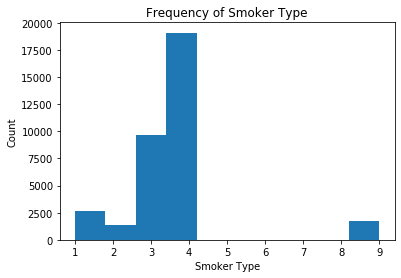

In [119]:
# Explore SMOKER3 data
plt.hist(tristate['_SMOKER3'])
plt.xlabel('Smoker Type')
plt.ylabel('Count')
plt.title('Frequency of Smoker Type')

In [120]:
cat_dict = {1: "Everyday",
             2: "Sometimes", 
             3: "Former", 
             4: "Never",
             9: np.nan}
tristate['SMOKER_CAT'] = tristate['_SMOKER3'].replace(cat_dict)

In [121]:
grouped2 = tristate.groupby(['_STATE', 'SMOKER_CAT'])['SMOKER_CAT'].count()
grouped2.axes
grouped2_data = grouped2.rename_axis(index={'SMOKER_CAT': 'SMOKE_FREQ'}).reset_index()
grouped2_data

,_STATE,SMOKE_FREQ,SMOKER_CAT
0,9.0,Everyday,713
1,9.0,Former,3218
2,9.0,Never,5790
3,9.0,Sometimes,351
4,34.0,Everyday,927
5,34.0,Former,3329
6,34.0,Never,6470
7,34.0,Sometimes,484
8,36.0,Everyday,1036
9,36.0,Former,3156


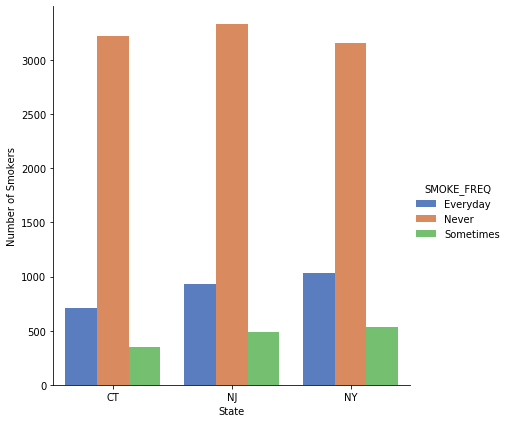

In [122]:
import seaborn as sns
# fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True)
g = sns.catplot(x="_STATE", y="SMOKE_CAT", hue="SMOKE_FREQ", data=grouped_data,
                height=6, kind="bar", palette="muted")
g.set_ylabels("Number of Smokers")
g.set_xlabels('State')
g.set_xticklabels(states)

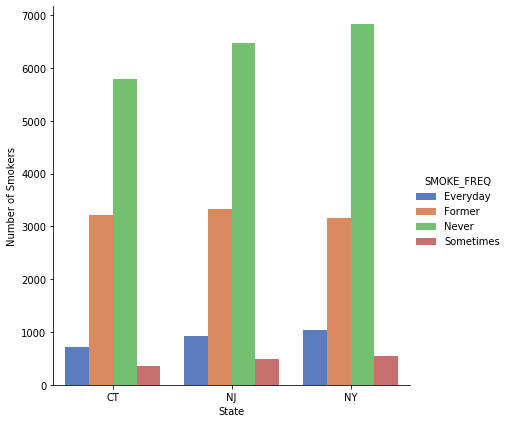

In [123]:
g2 = sns.catplot(x="_STATE", y="SMOKER_CAT", hue="SMOKE_FREQ", data=grouped2_data,
                height=6, kind="bar", palette="muted")
g2.set_ylabels("Number of Smokers")
g2.set_xlabels('State')
g2.set_xticklabels(states)

Text(0.5, 1.0, 'Number of Days Sick Per Month By State and Smoker Type')

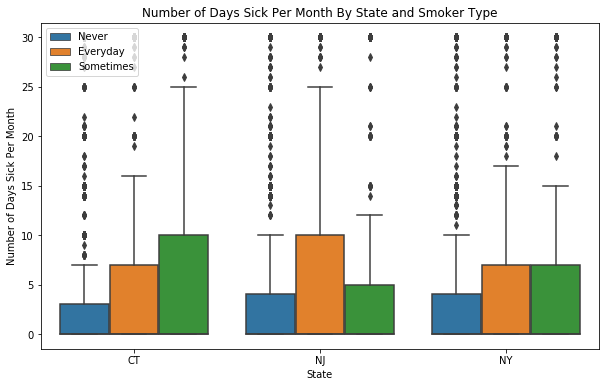

In [124]:
fig, ax = plt.subplots(figsize=(10,6))
g = sns.boxplot(x="_STATE", y="PHYSHLTH",
            hue="SMOKE_CAT",
            data=tristate, ax=ax)
g.set_xticklabels(states)
g.legend(loc=2)
g.set_ylabel('Number of Days Sick Per Month')
g.set_xlabel('State')
g.set_title('Number of Days Sick Per Month By State and Smoker Type')

Text(0.5, 1.0, 'Number of Days Sick Per Month By State and Smoker Type')

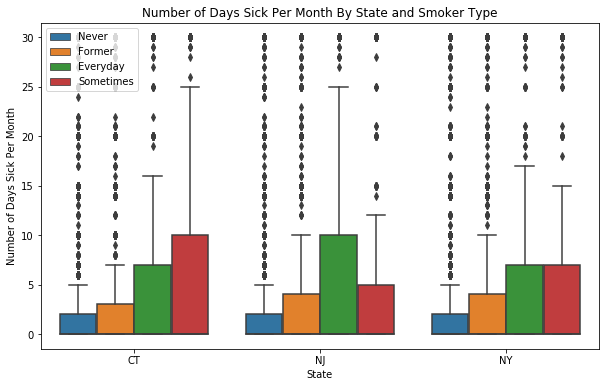

In [125]:
fig, ax = plt.subplots(figsize=(10,6))
g = sns.boxplot(x="_STATE", y="PHYSHLTH",
            hue="SMOKER_CAT",
            data=tristate, ax=ax)
g.set_xticklabels(states)
g.legend(loc=2)
g.set_ylabel('Number of Days Sick Per Month')
g.set_xlabel('State')
g.set_title('Number of Days Sick Per Month By State and Smoker Type')

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [126]:
alc_var = {777: np.nan, 
           888: 0, 
           999: np.nan}
tristate['ALC_MONTH'] = tristate['ALCDAY5'].replace(alc_var)
tristate.loc[tristate['ALC_MONTH'] < 200,'ALC_MONTH'] = (tristate.loc[tristate['ALCDAY5'] < 200,'ALCDAY5'] - 100) * (30.0/7.0)
tristate.loc[tristate['ALC_MONTH'] > 200,'ALC_MONTH'] -= 200
tristate['ALC_MONTH'].head()

49938     4.285714
49939    30.000000
49940          NaN
49941    12.857143
49942     4.285714
Name: ALC_MONTH, dtype: float64

In [127]:
tristate['ALC_MONTH'].describe()

count    19169.000000
mean         9.127557
std          9.189619
min          1.000000
25%          2.000000
50%          5.000000
75%         12.857143
max         30.000000
Name: ALC_MONTH, dtype: float64

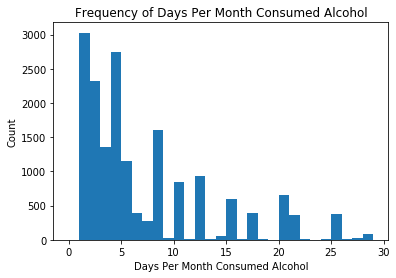

In [128]:
plt.hist(tristate['ALC_MONTH'], bins = range(0,30));
plt.xlabel('Days Per Month Consumed Alcohol')
plt.ylabel('Count')
plt.title('Frequency of Days Per Month Consumed Alcohol');

Text(0, 0.5, 'Days Per Month Consumed Alcohol')

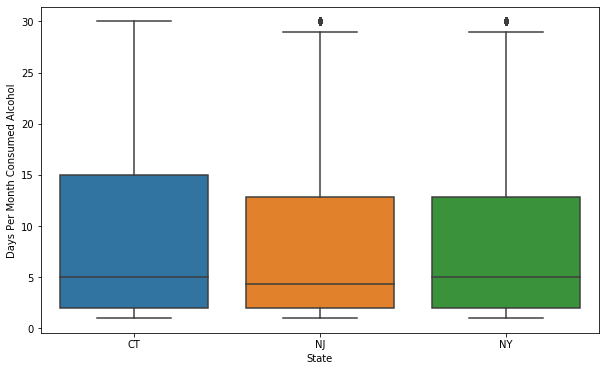

In [133]:
fig, ax = plt.subplots(figsize=(10,6))
g = sns.boxplot(x="_STATE", y="ALC_MONTH", data=tristate, ax=ax)
g.set_xticklabels(states)
g.set_xlabel('State')
g.set_ylabel('Days Per Month Consumed Alcohol')

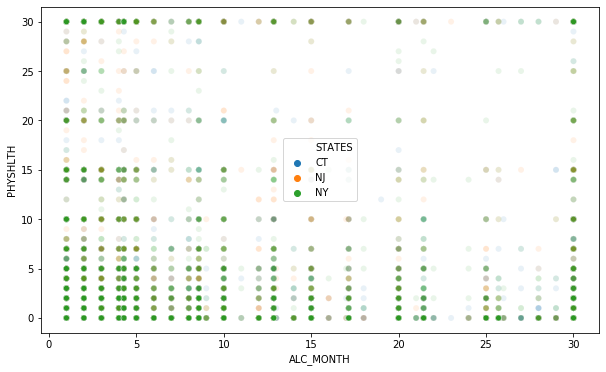

In [130]:
states_dict = {9: 'CT', 
               34: 'NJ', 
               36: 'NY'}
tristate['STATES'] = tristate['_STATE'].replace(states_dict)
fig, ax = plt.subplots(figsize=(10,6))
g = sns.scatterplot(x='ALC_MONTH', y = "PHYSHLTH", hue = 'STATES', data = tristate, alpha = 0.1, ax = ax)
ax

In [135]:
alc = tristate.loc[~np.isnan(tristate['ALC_MONTH']) & ~np.isnan(tristate['PHYSHLTH']), 'ALC_MONTH']
hlth = tristate.loc[~np.isnan(tristate['ALC_MONTH']) & ~np.isnan(tristate['PHYSHLTH']), 'PHYSHLTH']
np.corrcoef(alc, hlth)
# tristate.loc[tristate['ALC_MONTH'],'ALC_MONTH']

tristate[['PHYSHLTH', 'ALC_MONTH']].corr()

,PHYSHLTH,ALC_MONTH
PHYSHLTH,1.000000,-0.016495
ALC_MONTH,-0.016495,1.000000


## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [83]:
# your code here
educ_dict = {1:'No school', 
            2:'Elementary/MS',
            3:'Some HS', 
            4:'HS Grad',
            5:'Some College',
            6:'College Grad',
            9: np.nan}
tristate['EDUC_CAT'] = tristate['EDUCA'].replace(educ_dict)

In [84]:
tristate['EDUCA'].describe()

count    34545.000000
mean         5.057867
std          1.103404
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: EDUCA, dtype: float64

(array([    0.,    60.,   966.,  1386.,  8357.,  8098., 15482.,     0.,
          196.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

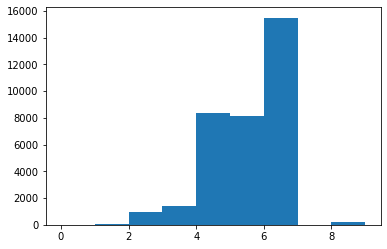

In [85]:
plt.hist(tristate['EDUCA'], bins = range(0, 10))

In [86]:
grouped_educ = tristate.groupby(['_STATE', 'EDUC_CAT'])['EDUC_CAT'].count()
grouped_educ
grouped_educ = grouped_educ.rename_axis(index={'EDUC_CAT': 'EDUC_FREQ'}).reset_index()
grouped_educ

,_STATE,EDUC_FREQ,EDUC_CAT
0,9.0,College Grad,5079
1,9.0,Elementary/MS,174
2,9.0,HS Grad,2513
3,9.0,No school,10
4,9.0,Some College,2439
5,9.0,Some HS,316
6,34.0,College Grad,5179
7,34.0,Elementary/MS,301
8,34.0,HS Grad,2952
9,34.0,No school,34


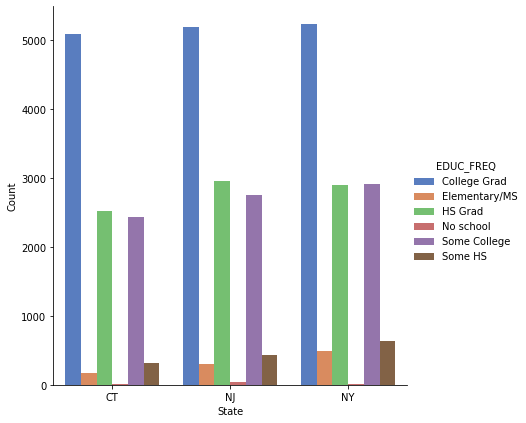

In [87]:
g = sns.catplot(x="_STATE", y="EDUC_CAT", hue="EDUC_FREQ", data=grouped_educ,
                height=6, kind="bar", palette="muted")
g.set_xlabels('State')
g.set_xticklabels(states)
g.set_ylabels('Count')

Text(0.5, 1.0, 'Number of Days Sick Per Month By State and Education Level')

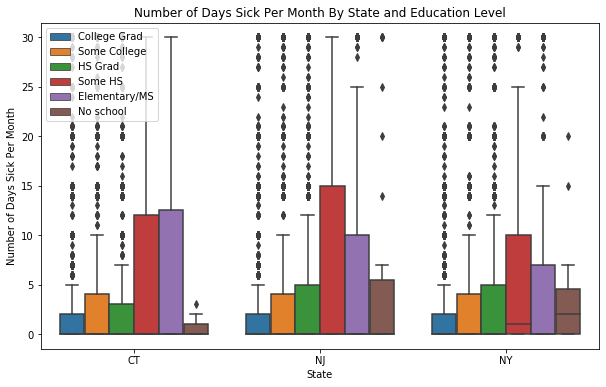

In [88]:
fig, ax = plt.subplots(figsize=(10,6))
g = sns.boxplot(x="_STATE", y="PHYSHLTH",
            hue="EDUC_CAT",
            data=tristate, ax=ax)
g.set_xticklabels(states)
g.legend(loc=2)
g.set_ylabel('Number of Days Sick Per Month')
g.set_xlabel('State')
g.set_title('Number of Days Sick Per Month By State and Education Level')

In [137]:
mental_var = {88: 0, 
              77: np.nan, 
              99: np.nan}
tristate['MENT_MONTH'] = tristate['MENTHLTH'].replace(mental_var)
tristate['MENT_MONTH'].head()

49938    2.0
49939    0.0
49940    0.0
49941    0.0
49942    0.0
Name: MENT_MONTH, dtype: float64

In [138]:
tristate['MENT_MONTH'].describe()

count    33892.000000
mean         3.464003
std          7.755965
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: MENT_MONTH, dtype: float64

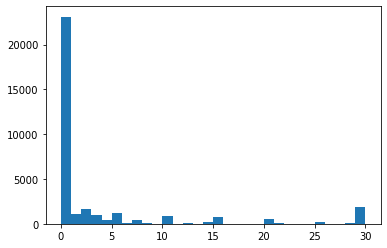

In [139]:
plt.hist(tristate['MENT_MONTH'], bins = range(0, 31));

[Text(0, 0, 'CT'), Text(0, 0, 'NJ'), Text(0, 0, 'NY')]

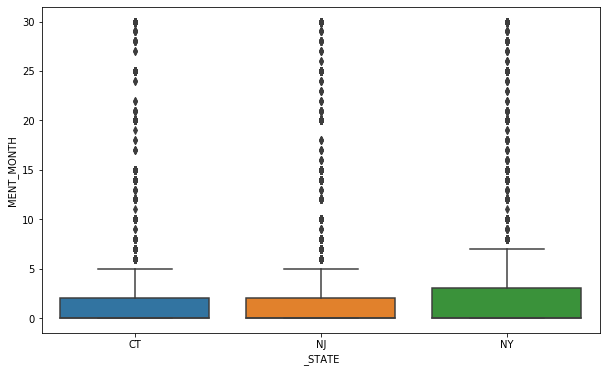

In [140]:
fig, ax = plt.subplots(figsize=(10,6))
g = sns.boxplot(x="_STATE", y="MENT_MONTH", data=tristate, ax=ax)
g.set_xticklabels(states)

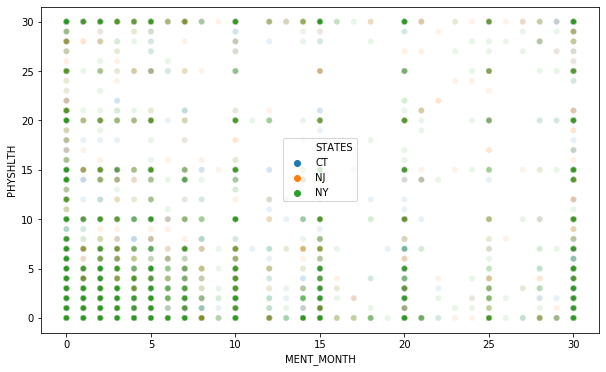

In [141]:
fig, ax = plt.subplots(figsize=(10,6))
g = sns.scatterplot(x='MENT_MONTH', y = "PHYSHLTH", hue = 'STATES', data = tristate, alpha = 0.1, ax = ax)

In [142]:
mental = tristate.loc[~np.isnan(tristate['MENT_MONTH']) & ~np.isnan(tristate['PHYSHLTH']), 'MENT_MONTH']
hlth = tristate.loc[~np.isnan(tristate['MENT_MONTH']) & ~np.isnan(tristate['PHYSHLTH']), 'PHYSHLTH']
np.corrcoef(mental, hlth)

tristate[['PHYSHLTH', 'MENT_MONTH']].corr()

,PHYSHLTH,MENT_MONTH
PHYSHLTH,1.000000,0.334038
MENT_MONTH,0.334038,1.000000


## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. Socioeconomic status is positively correlated with physical health.

2. Mental health is negatively correlated with physical health.

3. History of substance or alcohol use is negatively correlated with physical health.

## Bonus: Create some cool graphics.  